# 딥러닝 기본 예제

#### - 데이터 읽어오기

In [2]:
import numpy as np

raw_data = np.genfromtxt("../_dataset/x09.txt", skip_header=36)
raw_data
#--> 첫번째 컬럼은 index, 두번째 컬럼은 구분선 개념, 3~5번째 컬럼이 실제 데이터값
#--> 3 col: Weight, 4 col: Age, 5 col: Blood fat

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

#### - 데이터 확인

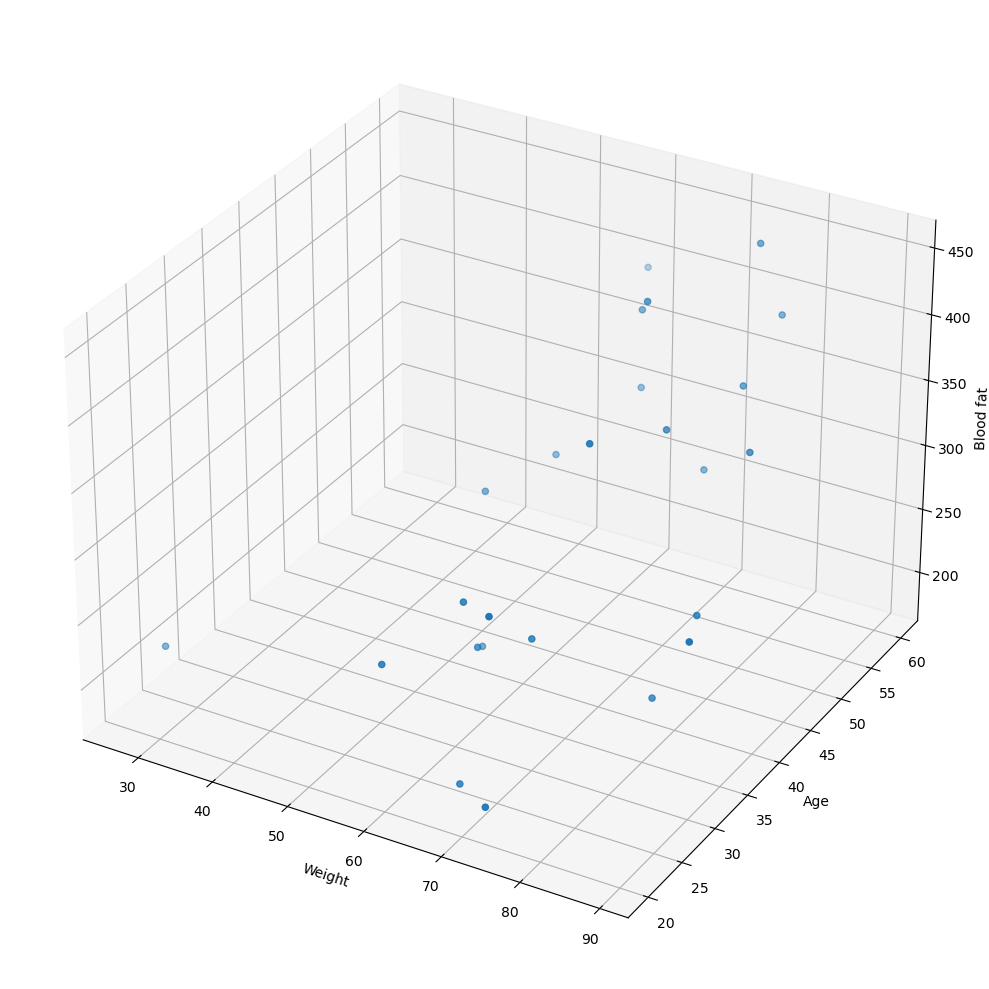

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
# ax.view_init(15,15)
plt.tight_layout()
plt.show()

#### - 딥러닝의 목표

- 현재 간단한 데이터셋을 활용한 딥러닝의 목표는...

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/30b4a9d7-24e8-4a19-96bb-5d9f6c9def33" width="67%">

	- 나이와 몸무게 정보로 blood fat을 예측하는 모델을 만든다. <br></br>

- 먼저 주어진 데이터로 모델을 얻는다.

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/ebd8f416-56ea-4c86-9652-0695f97668fb" width="67%">

	- 주어진 데이터에서 하나의 직선 모델을 만들고 싶다. 그렇다면 이 직선 모델을 어떻게 찾을 것인가?

	- 뉴런 하나만 사용한다. 직선 하나를 찾는 데 뉴런 하나면 된다.

	- 입력값$x$인 나이와 몸무게는 알고 있고, 결과값$y$인 Blood fat도 알고 있다.
	
	- 우리가 모르는 것은 가중치 $w1,~w2\,$벡터와 회귀모델에 필요한 상수항 $b\,$벡터이다.

	- 이 모르는 값을 구하면 모델을 찾는 것이다. <br></br>

- 모델을 구한 후 임의의 $x$값을 모델에 입력해 $y$값을 예측한다.

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/02382a55-53da-42bc-ab41-fca09f81170b" width="67%"> <br></br>

- 우리의 목표는 모르는 Weight와 Bias를 구하는 것이다.

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/6c10d2cf-35d0-42fe-84e2-0d3e3e5d495c" width="67%">

	- X --> $(25 \times 2),~~$ W --> $(2 \times 1),~~$ b --> $(25 \times 1)$ 이므로 $~$ y --> $(25 \times 1)$이다.

In [11]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)
y_data.shape #--> 25 X 1 로 reshape 필요

(25,)

In [12]:
y_data = y_data.reshape((25,1))
y_data.shape

(25, 1)

#### - 원래 의도한 모델 만들기

In [13]:
# !pip install tensorflow

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/276.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/276.5 MB 5.9 MB/s eta 0:00:47
   ---------------------------------------- 0.6/276.5 MB 5.9 MB/s eta 0:00:47
   ---------------------------------------- 1.1/276.5 MB 7.6 MB/s eta 0:00:37
   ---------------------------------------- 1.6/276.5 MB 8.6 MB/s eta 0:00:32
   ---------------------------------------- 2.3/276.5 MB 9.3 MB/s eta 0:00:30
   ---------------------------------------- 3.0/276.5 MB 9.6 MB/s eta 0:00:29
   ---------------------------------------- 3.4/276.5 MB 9.5 MB/s eta 0:00:29
    --------------------------------------- 3.6/276.5 MB 8.8 MB/s eta 0:00:32
    --------------------------------------- 4.0/276.5 MB 8.7 MB/s eta 0:00:32
    --------------------------------------- 4.3/276.5 MB 9.1 MB/s eta 0:00:30
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sqlalchemy 2.0.27 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.


In [14]:
import tensorflow as tf

model = tf.keras.models.Sequential([
	tf.keras.layers.Dense(1, input_shape=(2,))
]) #--> Neuron 1 layer, 입력값 2개 설정

model.compile(optimizer='rmsprop', loss='mse')

#### 손실함수 & 최적화

<img src="https://github.com/ElaYJ/supplement/assets/153154981/164b94ca-2c36-4444-88b0-a11436b6971c" width="57%">

<img src="https://github.com/ElaYJ/supplement/assets/153154981/ba321ab0-f6ff-41a6-a56f-be7c573c6aa2" width="57%">

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### - 모델 학습시키기

<img src="https://github.com/ElaYJ/supplement/assets/153154981/3c1e109d-a5c7-4372-9298-95d315974553" width="57%">

In [16]:
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 1s 511ms/step - loss: 142388.7500
Epoch 2/5000
1/1 [==============================] - 0s 9ms/step - loss: 142127.7969
Epoch 3/5000
1/1 [==============================] - 0s 8ms/step - loss: 141938.7188
Epoch 4/5000
1/1 [==============================] - 0s 9ms/step - loss: 141780.5469
Epoch 5/5000
1/1 [==============================] - 0s 10ms/step - loss: 141640.2344
Epoch 6/5000
1/1 [==============================] - 0s 17ms/step - loss: 141511.7188
Epoch 7/5000
1/1 [==============================] - 0s 13ms/step - loss: 141391.6562
Epoch 8/5000
1/1 [==============================] - 0s 17ms/step - loss: 141277.9375
Epoch 9/5000
1/1 [==============================] - 0s 20ms/step - loss: 141169.1719
Epoch 10/5000
1/1 [==============================] - 0s 17ms/step - loss: 141064.3125
Epoch 11/5000
1/1 [==============================] - 0s 8ms/step - loss: 140962.7031
Epoch 12/5000
1/1 [==============================] - 0s 25ms/step 

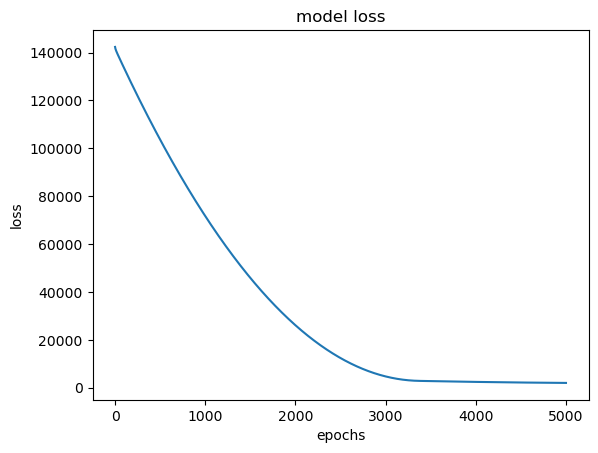

In [17]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [29]:
hist.history['loss']

[142388.75,
 142127.796875,
 141938.71875,
 141780.546875,
 141640.234375,
 141511.71875,
 141391.65625,
 141277.9375,
 141169.171875,
 141064.3125,
 140962.703125,
 140863.71875,
 140766.984375,
 140672.125,
 140578.90625,
 140487.046875,
 140396.40625,
 140306.8125,
 140218.140625,
 140130.234375,
 140043.078125,
 139956.546875,
 139870.5625,
 139785.0625,
 139700.046875,
 139615.375,
 139531.078125,
 139447.125,
 139363.421875,
 139279.96875,
 139196.765625,
 139113.78125,
 139030.984375,
 138948.34375,
 138865.875,
 138783.546875,
 138701.34375,
 138619.265625,
 138537.3125,
 138455.4375,
 138373.671875,
 138291.984375,
 138210.375,
 138128.84375,
 138047.40625,
 137966.015625,
 137884.65625,
 137803.390625,
 137722.171875,
 137641.0,
 137559.875,
 137478.796875,
 137397.765625,
 137316.765625,
 137235.8125,
 137154.90625,
 137074.015625,
 136993.1875,
 136912.375,
 136831.59375,
 136750.875,
 136670.15625,
 136589.484375,
 136508.828125,
 136428.203125,
 136347.625,
 136267.046875

In [30]:
hist.history

{'loss': [142388.75,
  142127.796875,
  141938.71875,
  141780.546875,
  141640.234375,
  141511.71875,
  141391.65625,
  141277.9375,
  141169.171875,
  141064.3125,
  140962.703125,
  140863.71875,
  140766.984375,
  140672.125,
  140578.90625,
  140487.046875,
  140396.40625,
  140306.8125,
  140218.140625,
  140130.234375,
  140043.078125,
  139956.546875,
  139870.5625,
  139785.0625,
  139700.046875,
  139615.375,
  139531.078125,
  139447.125,
  139363.421875,
  139279.96875,
  139196.765625,
  139113.78125,
  139030.984375,
  138948.34375,
  138865.875,
  138783.546875,
  138701.34375,
  138619.265625,
  138537.3125,
  138455.4375,
  138373.671875,
  138291.984375,
  138210.375,
  138128.84375,
  138047.40625,
  137966.015625,
  137884.65625,
  137803.390625,
  137722.171875,
  137641.0,
  137559.875,
  137478.796875,
  137397.765625,
  137316.765625,
  137235.8125,
  137154.90625,
  137074.015625,
  136993.1875,
  136912.375,
  136831.59375,
  136750.875,
  136670.15625,
  136

#### Predict

- 데이터를 이요해 모델을 만들고 학습했으니 예측해본다.

- 몸무게가 100이고, 44살 된 사람의 Blood fat은???

In [18]:
model.predict(np.array([100,44]).reshape(1,2))

1/1 [==============================] - 0s 140ms/step


array([[385.49603]], dtype=float32)

In [20]:
np.array([100,44]), np.array([100,44]).shape

(array([100,  44]), (2,))

In [21]:
np.array([100,44]).reshape(1,2)

array([[100,  44]])

In [22]:
model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 34ms/step


array([[226.71913]], dtype=float32)

In [23]:
# weight, bias

W_, b_ = model.get_weights()
print('Weight is:', W_)
print("bias is:", b_)

Weight is: [[1.742361]
 [4.68855 ]]
bias is: [4.9637356]


#### - 모델 확인

- 모델이 잘 만들어졌는지 확인하기 위해 20kg부터 100kg까지 50개의 데이터와 10살부터 70살까지의 50개의 데이터를 만들어 그려서 확인한다.

In [24]:
x = np.linspace(20, 100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50,1)

X = np.concatenate((x,y), axis=1)
X

array([[ 20.        ,  10.        ],
       [ 21.63265306,  11.2244898 ],
       [ 23.26530612,  12.44897959],
       [ 24.89795918,  13.67346939],
       [ 26.53061224,  14.89795918],
       [ 28.16326531,  16.12244898],
       [ 29.79591837,  17.34693878],
       [ 31.42857143,  18.57142857],
       [ 33.06122449,  19.79591837],
       [ 34.69387755,  21.02040816],
       [ 36.32653061,  22.24489796],
       [ 37.95918367,  23.46938776],
       [ 39.59183673,  24.69387755],
       [ 41.2244898 ,  25.91836735],
       [ 42.85714286,  27.14285714],
       [ 44.48979592,  28.36734694],
       [ 46.12244898,  29.59183673],
       [ 47.75510204,  30.81632653],
       [ 49.3877551 ,  32.04081633],
       [ 51.02040816,  33.26530612],
       [ 52.65306122,  34.48979592],
       [ 54.28571429,  35.71428571],
       [ 55.91836735,  36.93877551],
       [ 57.55102041,  38.16326531],
       [ 59.18367347,  39.3877551 ],
       [ 60.81632653,  40.6122449 ],
       [ 62.44897959,  41.83673469],
 

In [25]:
Z = np.matmul(X, W_) + b_
Z

array([[ 86.69645452],
       [ 95.28220709],
       [103.86795966],
       [112.45371222],
       [121.03946479],
       [129.62521735],
       [138.21096992],
       [146.79672248],
       [155.38247505],
       [163.96822761],
       [172.55398018],
       [181.13973274],
       [189.72548531],
       [198.31123787],
       [206.89699044],
       [215.482743  ],
       [224.06849557],
       [232.65424813],
       [241.2400007 ],
       [249.82575326],
       [258.41150583],
       [266.99725839],
       [275.58301096],
       [284.16876352],
       [292.75451609],
       [301.34026865],
       [309.92602122],
       [318.51177378],
       [327.09752635],
       [335.68327891],
       [344.26903148],
       [352.85478404],
       [361.44053661],
       [370.02628917],
       [378.61204174],
       [387.1977943 ],
       [395.78354687],
       [404.36929943],
       [412.955052  ],
       [421.54080456],
       [430.12655713],
       [438.71230969],
       [447.29806226],
       [455

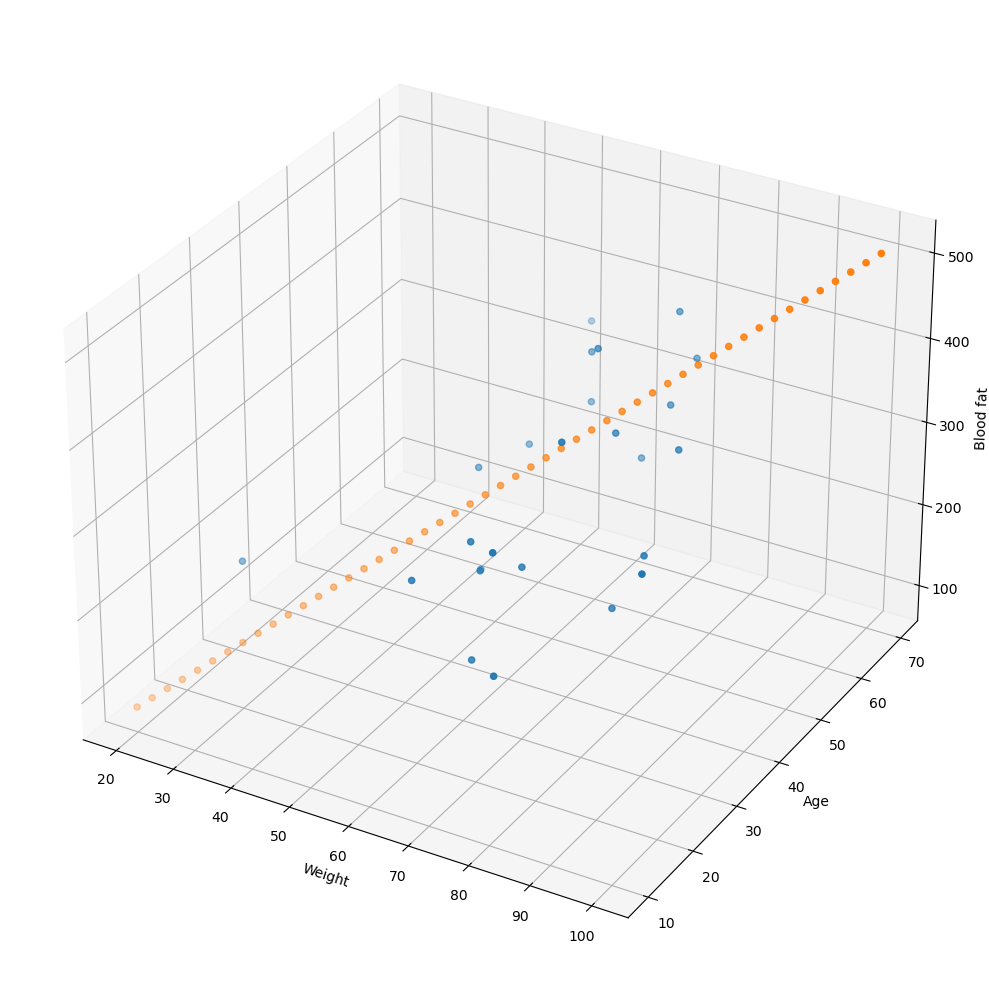

In [28]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs) #--> 원본 데이터
ax.scatter(x, y, Z) #--> 모델
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
plt.tight_layout()
plt.show()